In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import heartpy as hp
import pickle
import json

In [2]:
dataset_dir = "../../data_set"
data_dir = {}
processed_data_dir = {}
for file in os.listdir(dataset_dir):
    f = os.path.join(dataset_dir, file)
    participant_num = f.split('.')[-2].split("subject_")[-1]
    f_open = open(f)
    data_dir["participant_" + participant_num] = json.load(f_open)
    f_open.close()
    print("Loaded " + str(file))

Loaded subject_1.json
Loaded subject_10.json
Loaded subject_11.json
Loaded subject_12.json
Loaded subject_13.json
Loaded subject_14.json
Loaded subject_15.json
Loaded subject_16.json
Loaded subject_17.json
Loaded subject_18.json
Loaded subject_19.json
Loaded subject_2.json
Loaded subject_20.json
Loaded subject_21.json
Loaded subject_22.json
Loaded subject_23.json
Loaded subject_3.json
Loaded subject_4.json
Loaded subject_5.json
Loaded subject_6.json
Loaded subject_7.json
Loaded subject_8.json
Loaded subject_9.json


In [3]:
def plot_raw(participant_num, clip_num):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
    fig.suptitle('clip #'+str(clip_num) , fontsize=15)
    
    axes[0].plot(data_dir['participant_'+str(participant_num)]['ECG']['baseline'][clip_num][0:1024])
    axes[0].set_title('participant_'+str(participant_num) + ' baseline')
    
    axes[1].plot(data_dir['participant_'+str(participant_num)]['ECG']['stimuli'][clip_num][0:1024])
    axes[1].set_title('participant_'+str(participant_num) + ' stimuli')
    
    
def plot_raw_filtered(participant_num, clip_num):
    
    processed_data_dir['participant_'+str(participant_num)] = {}
    processed_data_dir['participant_'+str(participant_num)]['ECG'] = {} 
    processed_data_dir['participant_'+str(participant_num)]['ECG']['stimuli'] = {} 
    processed_data_dir['participant_'+str(participant_num)]['ECG']['baseline'] = {} 
#     processed_data_dir['participant_'+str(participant_num)]['ECG']['stimuli'][clip_num]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
    fig.suptitle('clip #'+str(clip_num) , fontsize=15)
    
    ch1 = [row[0] for row in data_dir['participant_'+str(participant_num)]['ECG']['baseline'][clip_num]]
    ch2 = [row[1] for row in data_dir['participant_'+str(participant_num)]['ECG']['baseline'][clip_num]]
    
    
    ch1_filtered = hp.remove_baseline_wander(ch1, 256)
    ch2_filtered = hp.remove_baseline_wander(ch2, 256)
    result = np.column_stack((ch1_filtered, ch2_filtered))
    
    processed_data_dir['participant_'+str(participant_num)]['ECG']['baseline'][str(clip_num)] = result
    
    axes[0].plot(result[0:1024])
    axes[0].set_title('participant_'+str(participant_num) + ' baseline')
    
    ch1 = [row[0] for row in data_dir['participant_'+str(participant_num)]['ECG']['stimuli'][clip_num]]
    ch2 = [row[1] for row in data_dir['participant_'+str(participant_num)]['ECG']['stimuli'][clip_num]]
    
    ch1_filtered = hp.remove_baseline_wander(ch1, 256)
    ch2_filtered = hp.remove_baseline_wander(ch2, 256)
    result = np.column_stack((ch1_filtered, ch2_filtered))
    axes[1].plot(result[0:1024])
    axes[1].set_title('participant_'+str(participant_num) + ' stimuli')
    
    processed_data_dir['participant_'+str(participant_num)]['ECG']['stimuli'][str(clip_num)] = result
    
    

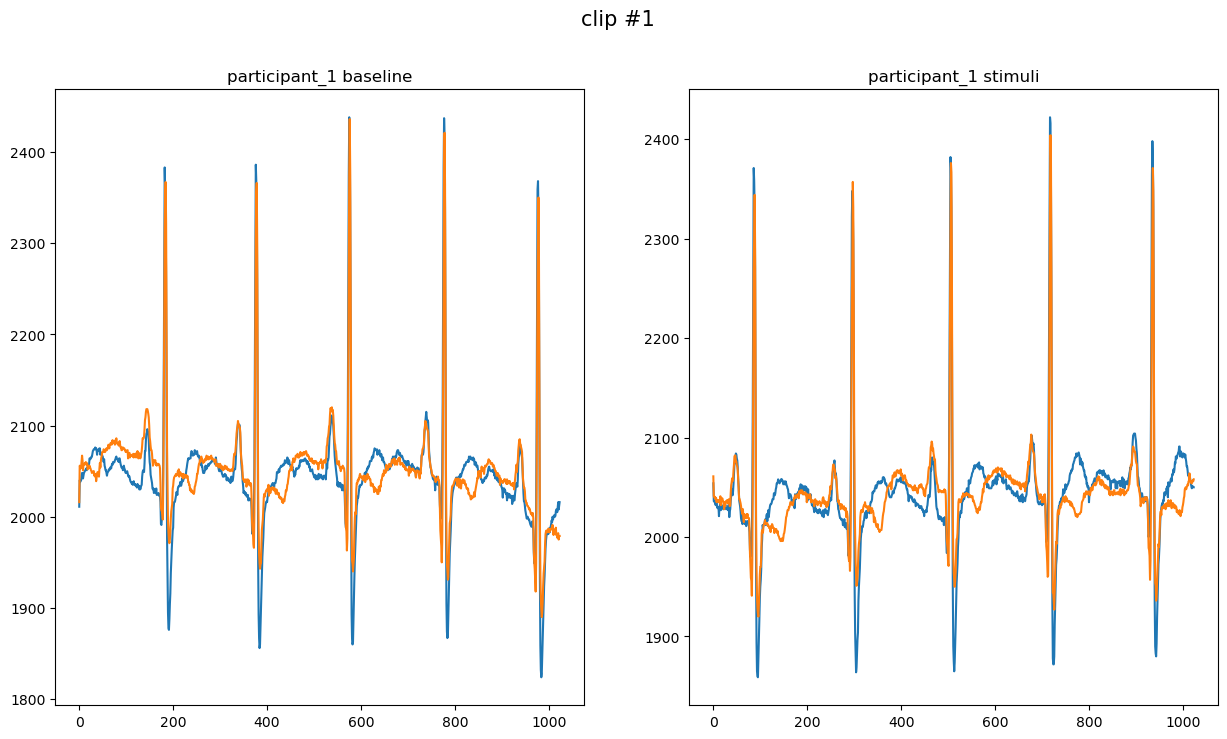

In [4]:
for i in range(1,2):
        plot_raw(1, i)
#matplotlib.pyplot.close()

### Generate .pkl with data from all participants

In [5]:
def drop_EEG_data ():
    for participant in data_dir:
        data_dir[participant].pop('EEG')
        print(participant + " Dropped EEG Data")
        
drop_EEG_data ()

participant_1 Dropped EEG Data
participant_10 Dropped EEG Data
participant_11 Dropped EEG Data
participant_12 Dropped EEG Data
participant_13 Dropped EEG Data
participant_14 Dropped EEG Data
participant_15 Dropped EEG Data
participant_16 Dropped EEG Data
participant_17 Dropped EEG Data
participant_18 Dropped EEG Data
participant_19 Dropped EEG Data
participant_2 Dropped EEG Data
participant_20 Dropped EEG Data
participant_21 Dropped EEG Data
participant_22 Dropped EEG Data
participant_23 Dropped EEG Data
participant_3 Dropped EEG Data
participant_4 Dropped EEG Data
participant_5 Dropped EEG Data
participant_6 Dropped EEG Data
participant_7 Dropped EEG Data
participant_8 Dropped EEG Data
participant_9 Dropped EEG Data


In [6]:
with open('../../data_set_raw_ECG/raw_data_dict.pkl', 'wb') as f:
    pickle.dump(data_dir, f)

with open('../../data_set_raw_ECG/raw_data_dict.json', 'w') as f:
    json.dump(data_dir, f)

In [7]:
data_dir['participant_23']['ECG'].keys()
len(data_dir['participant_23']['ECG']['baseline'])

18